# ML Case Study 2

## Predicting Car Prices Using Machine Learning

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [2]:
df = sns.load_dataset('mpg')

print("Dataset Shape:", df.shape)
print()
print("Columns:", df.columns)
df.head()

Dataset Shape: (398, 9)

Columns: Index(['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'model_year', 'origin', 'name'],
      dtype='object')


,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


## Data Cleaning

In [3]:
df.dropna(inplace=True)

# Encode categorical columns
le = LabelEncoder()
df['origin'] = le.fit_transform(df['origin'])
df['name'] = le.fit_transform(df['name'])

## Feature Selection

In [5]:
X = df.drop('mpg', axis=1)
y = df['mpg']

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardizing the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## Linear Regression

In [ ]:
lr_model = LinearRegression()
lr_model.fit(X_train_scaled, y_train)
y_pred_lr = lr_model.predict(X_test_scaled)

# Evaluation
print("Linear Regression Metrics:")
print("MAE:", mean_absolute_error(y_test, y_pred_lr))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_lr)))
print("R² Score:", r2_score(y_test, y_pred_lr))

Linear Regression Metrics:
MAE: 2.594417699584601
RMSE: 3.296715300907792
R² Score: 0.7870648984522024


## Random Forest


In [9]:
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

# Evaluation
print("Random Forest Metrics:")
print("MAE:", mean_absolute_error(y_test, y_pred_rf))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_rf)))
print("R² Score:", r2_score(y_test, y_pred_rf))

Random Forest Metrics:
MAE: 1.7114683544303793
RMSE: 2.3918763197778268
R² Score: 0.8879113057500202


## Visualization

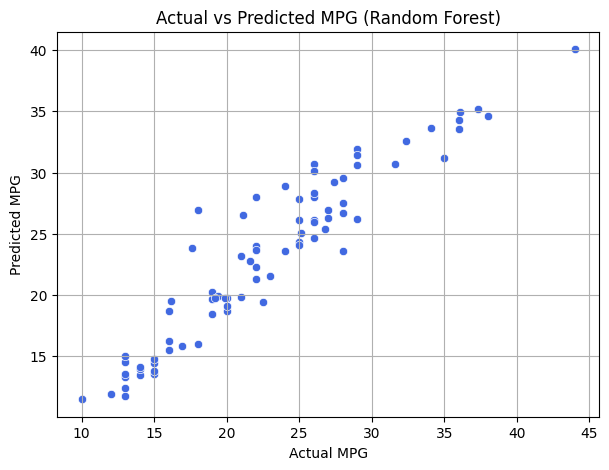

In [10]:
plt.figure(figsize=(7, 5))
sns.scatterplot(x=y_test, y=y_pred_rf, color='royalblue')
plt.xlabel("Actual MPG")
plt.ylabel("Predicted MPG")
plt.title("Actual vs Predicted MPG (Random Forest)")
plt.grid(True)
plt.show()


## Important Features

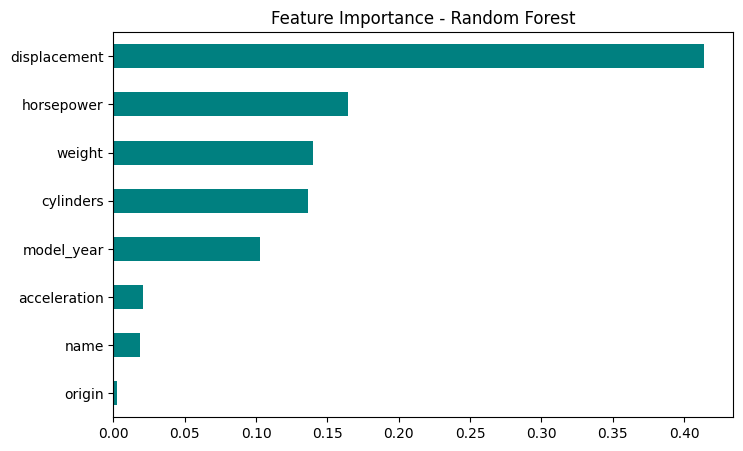

In [11]:
importances = pd.Series(rf_model.feature_importances_, index=X.columns)
importances.sort_values().plot(kind='barh', figsize=(8,5), color='teal')
plt.title("Feature Importance - Random Forest")
plt.show()
